Purpose
------------
    
### Compare measured and predicted C:N:P stoichiometric patterns
Requires:
 - biom_stoich_monthly_GM15.nc
 - biom_stoich_monthly_Inomura20.nc
 - Stoichiometry_1x1degrees.nc

Authors : Pearse J. Buchanan, Tatsuro Tanioka & Allison Moreno


In [2]:
### import packages


import sys
print("python version =",sys.version[:5])

import os
import numpy as np
import xarray as xr
import netCDF4 as nc

# plotting packages
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sb
sb.set(style='ticks')
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import cmocean.cm as cmo
from cmocean.tools import lighten

from tqdm import tqdm


print("numpy version =", np.__version__)
print("xarray version =", xr.__version__)
print("seaborn version =", sb.__version__)
print("matplotlib version =", sys.modules[plt.__package__].__version__)
print("cartopy version =", sys.modules[ccrs.__package__].__version__)
print("cmocean version =", sys.modules[cmo.__package__].__version__)

python version = 3.7.6
numpy version = 1.20.3
xarray version = 0.18.2
seaborn version = 0.11.2
matplotlib version = 3.4.2
cartopy version = 0.18.0
cmocean version = 2.0


## Get data sets

In [8]:
## Observations
os.chdir("C://Users//pearseb//Dropbox//PostDoc//Data//stoichiometry")

data = nc.Dataset('Stoichiometry_1x1degrees.nc','r')
cp_obs = data.variables['C2P'][...]
np_obs = data.variables['N2P'][...]
cn_obs = data.variables['C2N'][...]

data.close()

C:\Users\pearseb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
C:\Users\pearseb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\pearseb\AppData\Local\Continuum\anaconda3\lib\site-packa

In [16]:
### Predictions
os.chdir("C://Users//pearseb//Dropbox//PostDoc//collaborations//Tatsuro & Moreno//data")

data = nc.Dataset('biom_stoich_monthly_GM15.nc','r')
np_GM15 = data.variables['N_P'][...]
cp_GM15 = data.variables['C_P'][...]
o2p_GM15 = data.variables['O2_P'][...]
RQ_GM15 = data.variables['RQ'][...]

data = nc.Dataset('biom_stoich_monthly_Inomura20.nc','r')
np_Ino20 = data.variables['N_P'][...]
cp_Ino20 = data.variables['C_P'][...]
o2p_Ino20 = data.variables['O2_P'][...]
RQ_Ino20 = data.variables['RQ'][...]

data = nc.Dataset('GM15_stoich_monthly.nc','r')
gm15_np = data.variables['N_P'][...]
gm15_cp = data.variables['C_P'][...]
gm15_o2p = data.variables['O2_P'][...]
gm15_RQ = data.variables['RQ'][...]

lon = data.variables['lon'][...]
lat = data.variables['lat'][...]

lat3D, mon3D, lon3D = np.meshgrid(lat, np.arange(1,13,1), lon)

data.close()

C:\Users\pearseb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
C:\Users\pearseb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\pearseb\AppData\Local\Continuum\anaconda3\lib\site-packa

### Mask the predicted values where observations don't exist

In [18]:
### CHOOSE Inomura20 or GM15
c_p = cp_Ino20
n_p = np_Ino20
c_n = c_p/n_p

pre_cp = np.ma.masked_where(np.isnan(obs_cp), c_p)
pre_np = np.ma.masked_where(np.isnan(obs_np), n_p)
pre_cn = np.ma.masked_where(np.isnan(obs_cn), c_n)

obs_cp = np.ma.masked_where(np.ma.getmask(pre_cp), obs_cp)
obs_np = np.ma.masked_where(np.ma.getmask(pre_np), obs_np)
obs_cn = np.ma.masked_where(np.ma.getmask(pre_cn), obs_cn)

lat3D_cp = np.ma.masked_where(np.ma.getmask(pre_cp), lat3D)
lat3D_np = np.ma.masked_where(np.ma.getmask(pre_np), lat3D)
lat3D_cn = np.ma.masked_where(np.ma.getmask(pre_cn), lat3D)

gm15_cn = gm15_cp / gm15_np
gm15_cp = np.ma.masked_where(np.ma.getmask(pre_cp), gm15_cp)
gm15_np = np.ma.masked_where(np.ma.getmask(pre_np), gm15_np)
gm15_cn = np.ma.masked_where(np.ma.getmask(pre_cn), gm15_cn)

print(np.ma.count(pre_cp), np.ma.count(obs_cp), np.ma.count(lat3D_cp), np.ma.count(gm15_cp))
print(np.ma.count(pre_np), np.ma.count(obs_np), np.ma.count(lat3D_np), np.ma.count(gm15_np))
print(np.ma.count(pre_cn), np.ma.count(obs_cn), np.ma.count(lat3D_cn), np.ma.count(gm15_cn))


389 389 389 389
403 403 403 403
1677 1677 1677 1677


### Compute correlations between observations and predictions

In [19]:
import scipy.stats as ss

cor_cp, pva_cp = ss.spearmanr(np.ma.compressed(obs_cp), np.ma.compressed(pre_cp))
cor_np, pva_np = ss.spearmanr(np.ma.compressed(obs_np), np.ma.compressed(pre_np))
cor_cn, pva_cn = ss.spearmanr(np.ma.compressed(obs_cn), np.ma.compressed(pre_cn))

cor_cp_gm15, pva_cp_gm15 = ss.spearmanr(np.ma.compressed(obs_cp), np.ma.compressed(gm15_cp))
cor_np_gm15, pva_np_gm15 = ss.spearmanr(np.ma.compressed(obs_np), np.ma.compressed(gm15_np))
cor_cn_gm15, pva_cn_gm15 = ss.spearmanr(np.ma.compressed(obs_cn), np.ma.compressed(gm15_cn))

from sklearn.metrics import mean_squared_error

rms_cp = mean_squared_error(np.ma.compressed(obs_cp), np.ma.compressed(pre_cp), squared=False)
rms_np = mean_squared_error(np.ma.compressed(obs_np), np.ma.compressed(pre_np), squared=False)
rms_cn = mean_squared_error(np.ma.compressed(obs_cn), np.ma.compressed(pre_cn), squared=False)

rms_cp_gm15 = mean_squared_error(np.ma.compressed(obs_cp), np.ma.compressed(gm15_cp), squared=False)
rms_np_gm15 = mean_squared_error(np.ma.compressed(obs_np), np.ma.compressed(gm15_np), squared=False)
rms_cn_gm15 = mean_squared_error(np.ma.compressed(obs_cn), np.ma.compressed(gm15_cn), squared=False)

## Figures

Text(0.8, 0.05, 'r = 0.14')

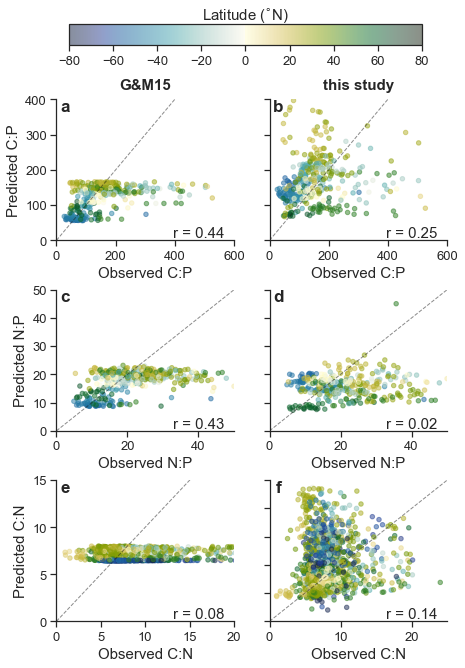

In [21]:

fstic=13
fslab=15
alf=0.5
size=20
lw=1
colmap=cmo.tools.lighten(cmo.delta, 0.8) 
vminx=-80; vmaxx=80

fig = plt.figure(figsize=(7,10))
gs = GridSpec(3,2)

ax1 = plt.subplot(gs[0,0])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(labelsize=fstic)
s1 = plt.scatter(np.ma.compressed(obs_cp), np.ma.compressed(gm15_cp), c=np.ma.compressed(lat3D_cp), \
                 cmap=colmap, alpha=alf, marker='o', s=size, vmin=vminx, vmax=vmaxx)
plt.plot((0,600),(0,600),'k--', linewidth=lw, alpha=alf)
plt.xlim(0,600); plt.ylim(0,400)
plt.xlabel('Observed C:P', fontsize=fslab)
plt.ylabel('Predicted C:P', fontsize=fslab)

ax2 = plt.subplot(gs[0,1])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(labelsize=fstic, labelleft=False)
s2 = plt.scatter(np.ma.compressed(obs_cp), np.ma.compressed(pre_cp), c=np.ma.compressed(lat3D_cp), \
                 cmap=colmap, alpha=alf, marker='o', s=size, vmin=vminx, vmax=vmaxx)
plt.plot((0,600),(0,600),'k--', linewidth=lw, alpha=alf)
plt.xlim(0,600); plt.ylim(0,400)
plt.xlabel('Observed C:P', fontsize=fslab)

ax3 = plt.subplot(gs[1,0])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.tick_params(labelsize=fstic)
s3 = plt.scatter(np.ma.compressed(obs_np), np.ma.compressed(gm15_np), c=np.ma.compressed(lat3D_np), \
                 cmap=colmap, alpha=alf, marker='o', s=size, vmin=vminx, vmax=vmaxx)
plt.plot((0,50),(0,50),'k--', linewidth=lw, alpha=alf)
plt.xlim(0,50); plt.ylim(0,50)
plt.xlabel('Observed N:P', fontsize=fslab)
plt.ylabel('Predicted N:P', fontsize=fslab)

ax4 = plt.subplot(gs[1,1])
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.tick_params(labelsize=fstic, labelleft=False)
s4 = plt.scatter(np.ma.compressed(obs_np), np.ma.compressed(pre_np), c=np.ma.compressed(lat3D_np), \
                 cmap=colmap, alpha=alf, marker='o', s=size, vmin=vminx, vmax=vmaxx)
plt.plot((0,50),(0,50),'k--', linewidth=lw, alpha=alf)
plt.xlim(0,50); plt.ylim(0,50)
plt.xlabel('Observed N:P', fontsize=fslab)


ax5 = plt.subplot(gs[2,0])
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.tick_params(labelsize=fstic)
s5 = plt.scatter(np.ma.compressed(obs_cn), np.ma.compressed(gm15_cn), c=np.ma.compressed(lat3D_cn), \
                 cmap=colmap, alpha=alf, marker='o', s=size, vmin=vminx, vmax=vmaxx)
plt.plot((0,20),(0,20),'k--', linewidth=lw, alpha=alf)
plt.xlim(0,20); plt.ylim(0,15)
plt.xlabel('Observed C:N', fontsize=fslab)
plt.ylabel('Predicted C:N', fontsize=fslab)

ax6 = plt.subplot(gs[2,1])
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.tick_params(labelsize=fstic, labelleft=False)
s6 = plt.scatter(np.ma.compressed(obs_cn), np.ma.compressed(pre_cn), c=np.ma.compressed(lat3D_cn), \
                 cmap=colmap, alpha=alf, marker='o', s=size, vmin=vminx, vmax=vmaxx)
plt.plot((0,25),(0,25),'k--', linewidth=lw, alpha=alf)
plt.xlim(0,25); plt.ylim(0,25)
plt.xlabel('Observed C:N', fontsize=fslab)


plt.subplots_adjust(top=0.85, hspace=0.35)

cbax = fig.add_axes([0.15,0.925,0.7,0.03])
cbax.tick_params(labelsize=fstic)
cbar = plt.colorbar(s1, cax=cbax, orientation='horizontal')
cbax.set_xlabel('Latitude ($^{\circ}$N)', fontsize=fslab)
cbax.xaxis.set_label_position('top')

xx=0.5; yy=1.10
plt.text(xx,yy,'G&M15', fontweight='bold', fontsize=fslab, transform=ax1.transAxes, ha='center', va='center')
plt.text(xx,yy,'this study', fontweight='bold', fontsize=fslab, transform=ax2.transAxes, ha='center', va='center')

xx=0.05; yy=0.95
plt.text(xx,yy,'a', fontweight='bold', fontsize=fslab+2, transform=ax1.transAxes, ha='center', va='center')
plt.text(xx,yy,'b', fontweight='bold', fontsize=fslab+2, transform=ax2.transAxes, ha='center', va='center')
plt.text(xx,yy,'c', fontweight='bold', fontsize=fslab+2, transform=ax3.transAxes, ha='center', va='center')
plt.text(xx,yy,'d', fontweight='bold', fontsize=fslab+2, transform=ax4.transAxes, ha='center', va='center')
plt.text(xx,yy,'e', fontweight='bold', fontsize=fslab+2, transform=ax5.transAxes, ha='center', va='center')
plt.text(xx,yy,'f', fontweight='bold', fontsize=fslab+2, transform=ax6.transAxes, ha='center', va='center')

xx=0.80; yy=0.05
plt.text(xx,yy,'r = %.2f'%(cor_cp_gm15), fontsize=fslab, transform=ax1.transAxes, ha='center', va='center')
plt.text(xx,yy,'r = %.2f'%(cor_cp), fontsize=fslab, transform=ax2.transAxes, ha='center', va='center')
plt.text(xx,yy,'r = %.2f'%(cor_np_gm15), fontsize=fslab, transform=ax3.transAxes, ha='center', va='center')
plt.text(xx,yy,'r = %.2f'%(cor_np), fontsize=fslab, transform=ax4.transAxes, ha='center', va='center')
plt.text(xx,yy,'r = %.2f'%(cor_cn_gm15), fontsize=fslab, transform=ax5.transAxes, ha='center', va='center')
plt.text(xx,yy,'r = %.2f'%(cor_cn), fontsize=fslab, transform=ax6.transAxes, ha='center', va='center')
